## Objective: Predict the probability of heart disease given patient data

Data columns:
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: According to the discussions on the dataset,0 is for people with heart disease and 1 is no heart disease.

Results:
* Chest pain, maximum heart rate achieved, and the slope of the peak exercise ST segment had lower correlations than the rest of the columns
* Achieved a ~91% score using GridSearch and cross validation on AUC scoring metric


In [191]:
#Import the usual packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [192]:
df=pd.read_csv('../input/heart-disease-uci/heart.csv')

In [193]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [194]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [195]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(303, 14)

No null values! Some data manipulation to have positive heart disease = 1 and negative heart disease = 0

In [196]:
df['goal'] = df['target'] + 1
df['goal'] = df['goal'].replace(2,0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,goal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


# EDA

Age vs Goal

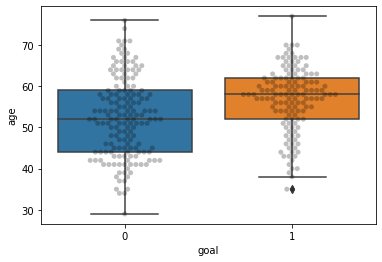

In [197]:
sns.boxplot(x=df['goal'],y=df['age'])
sns.swarmplot(x=df['goal'],y=df['age'],color='black',alpha=0.25)

Sex vs. Goal (0 = Female, 1 = Male)

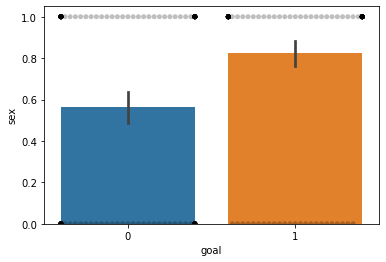

In [198]:
sns.barplot(x=df['goal'],y=df['sex'])
sns.swarmplot(x=df['goal'],y=df['sex'],color='black',alpha=0.25)

Resting Heart Rate vs Goal (There doesn't seem to be a big difference in resting heart rate as an indicator for heart disease)

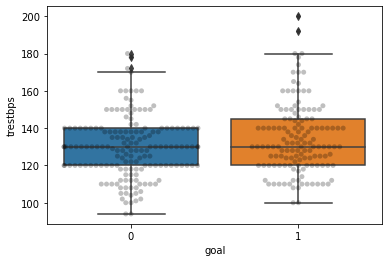

In [199]:
sns.boxplot(x=df['goal'],y=df['trestbps'])
sns.swarmplot(x=df['goal'],y=df['trestbps'],color='black',alpha=0.25)

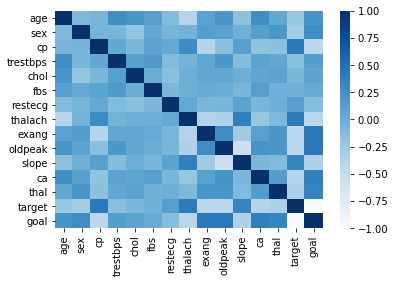

In [200]:
sns.heatmap(df.corr(),cmap='Blues')

Create bar plots to see the categories with higher correlations compared to goal

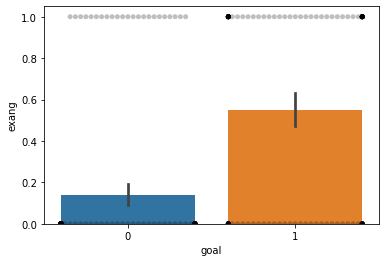

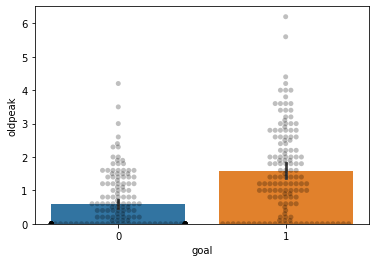

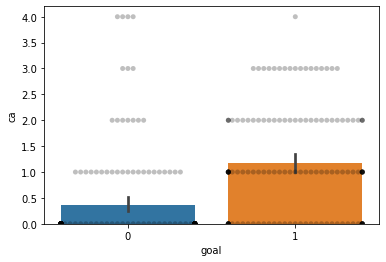

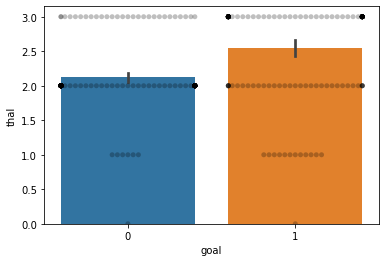

In [201]:
corr_columns = ['exang','oldpeak','ca','thal']
for i in range(len(corr_columns)):
    fig, axs = plt.subplots(1,1)
    sns.barplot(x=df['goal'],y=df[corr_columns[i]])
    sns.swarmplot(x=df['goal'],y=df[corr_columns[i]],color='black',alpha=0.25)
    

# Data Modeling

In [202]:
#Import the usual data modeling packages
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [203]:
X = df.drop(['target','goal'],axis=1)
y = df.goal.values

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
score=[]

Logistic Regression

In [205]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

s1=np.mean(cross_val_score(lr,X_train,y_train,scoring='roc_auc',cv=5))
score.append(s1*100)

KNN 

In [206]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

s2 = np.mean(cross_val_score(knn,X_train,y_train,scoring='roc_auc',cv=5))
score.append(s2*100)

Gradient Boosting

In [207]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

s3 = np.mean(cross_val_score(xgb,X_train,y_train,scoring='roc_auc',cv=5))
score.append(s3*100)

Random Forest

In [208]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

s4 = np.mean(cross_val_score(rf,X_train,y_train,scoring='roc_auc',cv=5))
score.append(s4*100)

SVM

In [209]:
svc = svm.SVC()
svc.fit(X_train,y_train)

s5 =np.mean(cross_val_score(svc,X_train,y_train,scoring='roc_auc',cv=5))
score.append(s5*100)

In [210]:
labels = ['LogisticRegression', 'KNN', 'XGB', 'RandomForest', 'SVM']
for i in range(len(labels)):
    print('The score for',label[i],'is:',score[i])


The accuracy score for LogisticRegression is: 88.5984385984386
The accuracy score for KNN is: 86.94614027947362
The accuracy score for XGB is: 87.37127070460403
The accuracy score for RandomForest is: 90.56576139909474
The accuracy score for SVM is: 88.2619849286516


In [213]:
parameters = {'n_estimators':range(10,300,10),'criterion':('gini', 'entropy'),'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='roc_auc',cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='roc_auc')

In [214]:
print(gs.best_score_)
print(gs.best_estimator_)

0.9181728765062097
RandomForestClassifier(criterion='entropy', n_estimators=220)


It looks like random forest was the best classifier and our GridSearch improved our model ever so slightly.